# Decentralized Consensus Detection

Descriptive text to be added

In [193]:
import math
import matplotlib
import matplotlib.pyplot as plt

from exp_dcd_heuristics import run_simulation

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Comparison of different detection heuristics

For none, total number of nodes travelled by all agents is 99916
For fix_enc, total number of nodes travelled by all agents is 6613
For abs_chg, total number of nodes travelled by all agents is 9565
For var_est, total number of nodes travelled by all agents is 11177
For var_est2, total number of nodes travelled by all agents is 19525
For conv_rate, total number of nodes travelled by all agents is 14083


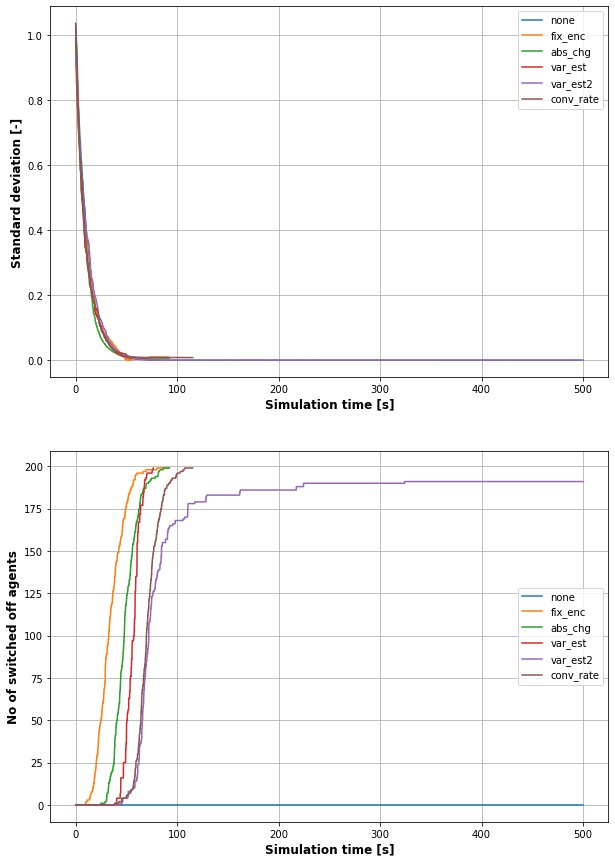

In [214]:
# agents
no_agents = 200
clock_rate = 1 # Poisson process for asynchronous agent actions
comm_limit = 1 # no of neighbors with whom a value can be averaged
agents = (no_agents, clock_rate, comm_limit)

# graph
graph_type = 'Gnp'
graph_size = 1000 # n
edge_probability = 0.5 # p
graph = (graph_type, graph_size, edge_probability)

# decentralized consensus detection (DCD)
heuristics_list = ['none', 'fix_enc', 'abs_chg', 'var_est', 'var_est2', 'conv_rate']
min_enc = 5
epsilon = 0.05 # agent assumes convergence when delta val < epsilon
n_conv = 5 # agent switches off when having subsequently seen n_conv agents with delta val < epsilon
window = 5
delta = 0.01
win_rate = 10
psi = 0.0001

pos_feedback = 'off'
n_off = 5 # agent switches off when having subsequently seen n_off other switched off agents

# simulation
simulation_time = 500
simulation_type = 'sweep'
simulation = (simulation_time, simulation_type)

# run, sit back, watch the extravaganza
fig, axs = plt.subplots(2, 1, figsize=(10,15))
for heuristic in heuristics_list:
    dcd = (heuristic, min_enc, epsilon, n_conv, window, delta, win_rate, psi, pos_feedback, n_off)
    (std_rt_val, std_rt_t, step_count_rt, agents_off_t, agents_off_val) = run_simulation(agents, graph, dcd, simulation)
    axs[0].plot(std_rt_t, std_rt_val, label='{}'.format(heuristic))
    axs[1].plot(agents_off_t, agents_off_val, label='{}'.format(heuristic))

axs[0].set_xlabel('Simulation time [s]', fontsize='large', fontweight='bold')
axs[0].set_ylabel('Standard deviation [-]', fontsize='large', fontweight='bold')
axs[0].legend()
#plt.xlim(20, 80)
#plt.ylim(0, 0.2)
axs[0].grid('k')

axs[1].set_xlabel('Simulation time [s]', fontsize='large', fontweight='bold')
axs[1].set_ylabel('No of switched off agents', fontsize='large', fontweight='bold')
axs[1].legend()
axs[1].grid('k')

plt.show()



Initial mean and standard deviation in agent values are (0.120, 0.859)
Final mean and standard deviation in agent values are (0.120, 0.000)
Total number of nodes travelled by all agents is 17140


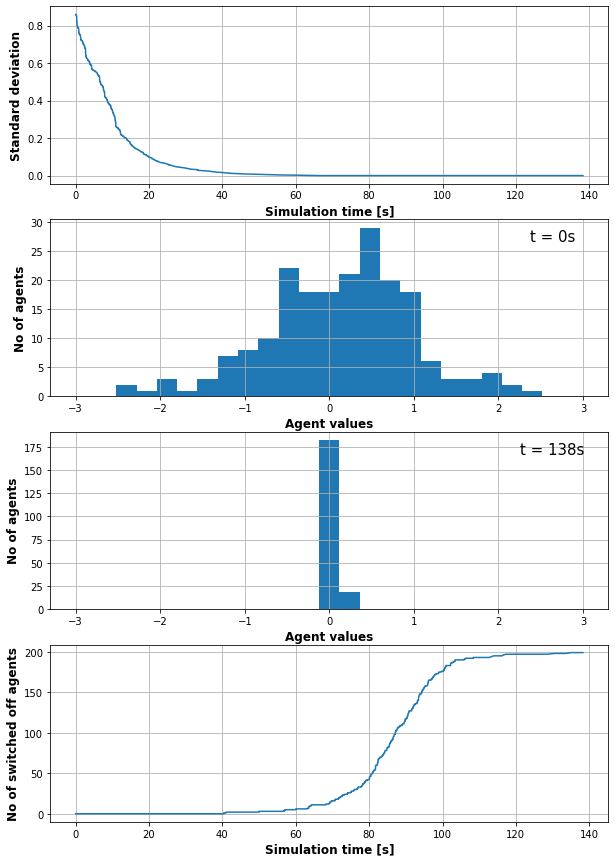

In [173]:
no_agents = 200
clock_rate = 1 # Poisson process for asynchronous agent actions
comm_limit = 1 # no of neighbors with whom a value can be averaged
agents = (no_agents, clock_rate, comm_limit)

# graph
graph_type = 'Gnp'
graph_size = 1000 # n
edge_probability = 0.5 # p
graph = (graph_type, graph_size, edge_probability)

# decentralized consensus detection (DCD)
heuristic = 'conv_rate'
epsilon = 0.05 # agent assumes convergence when delta val < epsilon
n_conv = 5 # agent switches off when having subsequently seen n_conv agents with delta val < epsilon
window = 5
delta = 0.01
win_rate = 10
psi = 0.00001
dcd = (heuristic, epsilon, n_conv, window, delta, win_rate, psi, pos_feedback, n_off)

pos_feedback = 'off'
n_off = 5 # agent switches off when having subsequently seen n_off other switched off agents

# simulation
simulation_time = 1000
simulation_type = 'single'
simulation = (simulation_time, simulation_type)


run_simulation(agents, graph, dcd, simulation)